# Examining the Data Set

In [78]:
# modules.

try:
    
    import math
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pylab as plt
    from sklearn.ensemble import RandomForestRegressor
    from IPython.display import display
    from sklearn import metrics
    from sklearn import tree
    import re
    from pandas.api.types import is_string_dtype
    from pandas.api.types import is_numeric_dtype
    import scipy
    from scipy.cluster import hierarchy as hc
    from pdpbox import pdp
    from plotnine import *

    
except:
    
    !pip3 install -r requirements.txt
    
    print("Run this cell again")


Defaulting to user installation because normal site-packages is not writeable
Run this cell again


In [2]:
# Test and training set.

train = pd.read_csv("train-data.csv")
test = pd.read_csv("test-data.csv")

In [3]:
# The first five lines from the train dataset.

train.head()

,x,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
# The last five lines in the Train dataset.

train.tail()

,x,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4986,4986,Honda Amaze VX i-DTEC,Kolkata,2013,38001,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,3.9
4987,4987,Mercedes-Benz E-Class 230 E AT,Mumbai,2008,77000,Petrol,Automatic,Second,10.0 kmpl,2496 CC,157.7 bhp,5.0,6.5
4988,4988,BMW 5 Series 530d M Sport,Hyderabad,2016,27000,Diesel,Automatic,First,18.59 kmpl,2993 CC,265 bhp,5.0,48.0
4989,4989,Audi A3 35 TDI Premium Plus,Mumbai,2016,39000,Diesel,Automatic,First,20.38 kmpl,1968 CC,143 bhp,5.0,18.9
4990,4990,Maruti Swift Dzire VDI,Pune,2015,131000,Diesel,Manual,First,26.59 kmpl,1248 CC,74 bhp,5.0,3.6


In [5]:
# Information about the train data set.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   x                  4991 non-null   int64  
 1   Name               4991 non-null   object 
 2   Location           4991 non-null   object 
 3   Year               4991 non-null   int64  
 4   Kilometers_Driven  4991 non-null   int64  
 5   Fuel_Type          4991 non-null   object 
 6   Transmission       4991 non-null   object 
 7   Owner_Type         4991 non-null   object 
 8   Mileage            4989 non-null   object 
 9   Engine             4958 non-null   object 
 10  Power              4958 non-null   object 
 11  Seats              4953 non-null   float64
 12  Price              4991 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 507.0+ KB


In [6]:
# Information about the test data set.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   x                  1028 non-null   int64  
 1   Name               1028 non-null   object 
 2   Location           1028 non-null   object 
 3   Year               1028 non-null   int64  
 4   Kilometers_Driven  1028 non-null   int64  
 5   Fuel_Type          1028 non-null   object 
 6   Transmission       1028 non-null   object 
 7   Owner_Type         1028 non-null   object 
 8   Mileage            1028 non-null   object 
 9   Engine             1025 non-null   object 
 10  Power              1025 non-null   object 
 11  Seats              1024 non-null   float64
 12  Price              1028 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 104.5+ KB


In [7]:
mean = np.mean(train.Price)

print("Average price of cars : ",mean)

Average price of cars :  9.496852334201563


In [8]:
fl1 = train.Price >= mean

a = 0

b = 0

for i in fl1:
    
    if i == True:
        
        a += 1
        
    else:
        
        b+=1
        
print("Number of vehicles above average price : ",a ,", The number of vehicles below the average price : ",b)

Number of vehicles above average price :  1319 , The number of vehicles below the average price :  3672


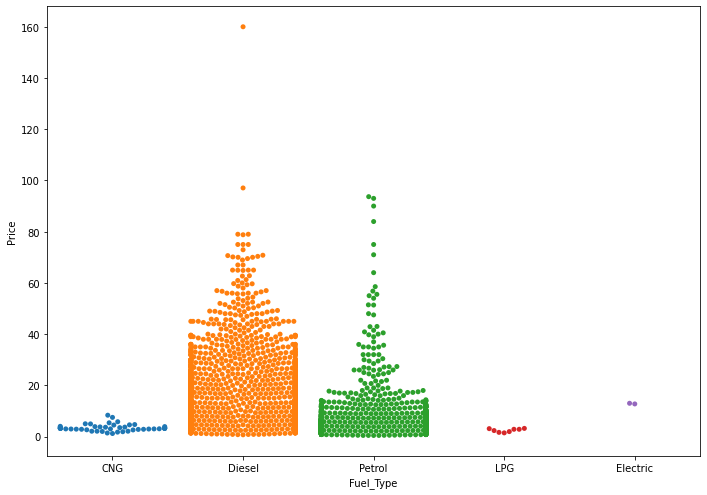

In [9]:
# Our fuel type visualization.

var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train)

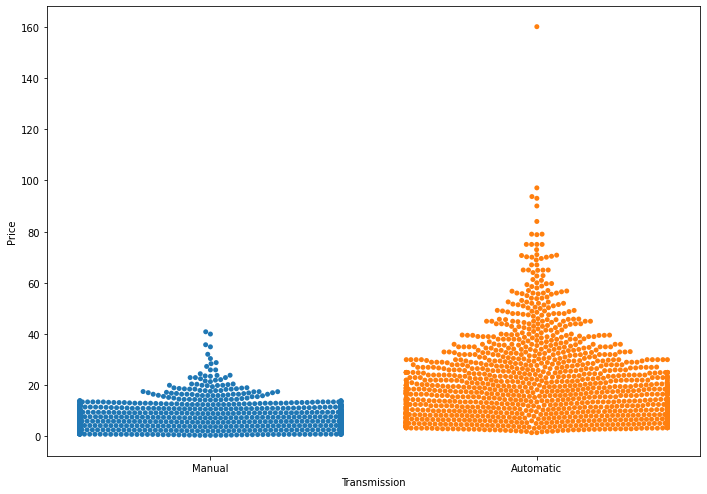

In [10]:
# Our gear type visualization.

var = 'Transmission'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train)

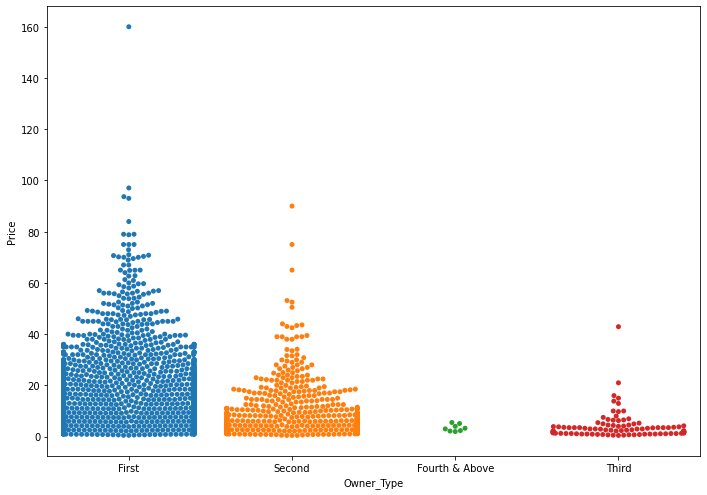

In [11]:
# Owner Type visualization.

var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train)

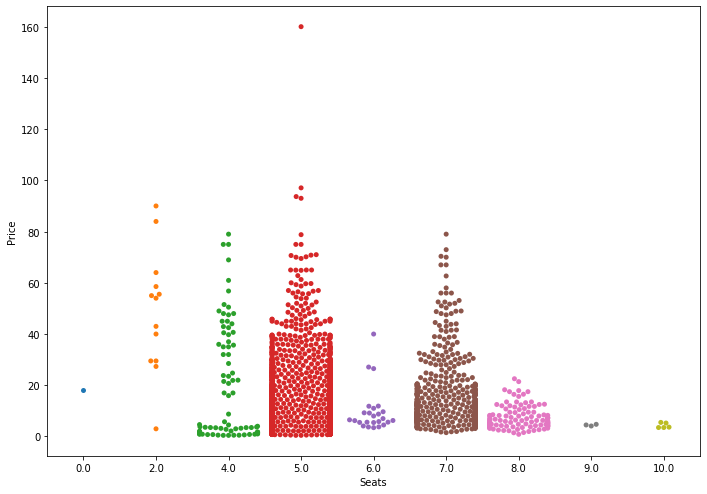

In [12]:
# Our seat count visualization.

var = 'Seats'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Price', data = train)

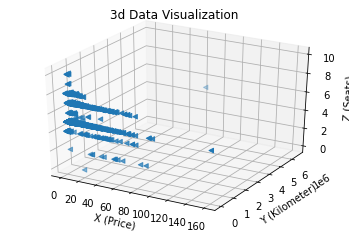

In [13]:
# I was able to scroll the normal view and examine the relationship in 3 dimensions. However, jupyter-notebook does not allow it.

from mpl_toolkits.mplot3d import Axes3D # 3d visualization.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = ["<"] # Our shapes will appear on the chart

xs = [i for i in train.Price]
ys = [i for i in train.Kilometers_Driven]
zs = [i for i in train.Seats]
ax.scatter(xs, ys, zs, marker=m[0])

ax.set_xlabel('X (Price)') # label
ax.set_ylabel('Y (Kilometer)')
ax.set_zlabel('Z (Seats)')

plt.title("3d Data Visualization")

plt.show()

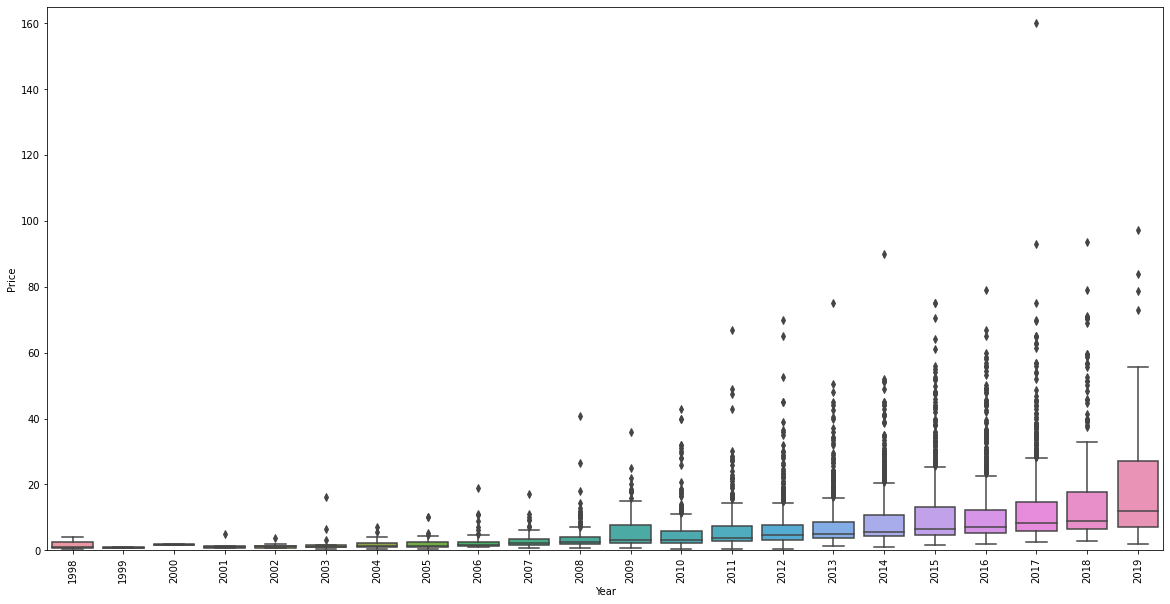

In [14]:
# Our visualization of the years cars were built.

var = 'Year'
data = pd.concat([train['Price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

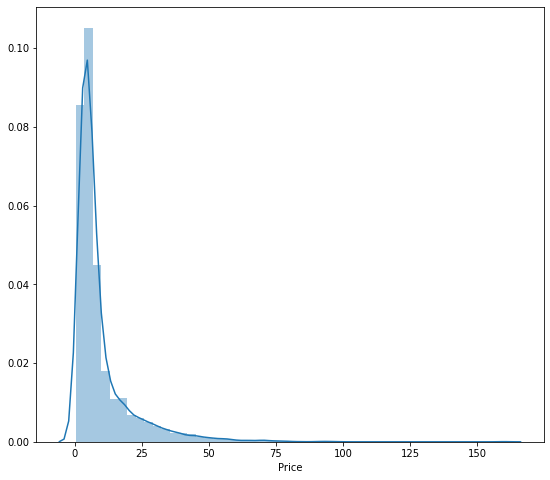

In [15]:
# Price visualization

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(train['Price'])

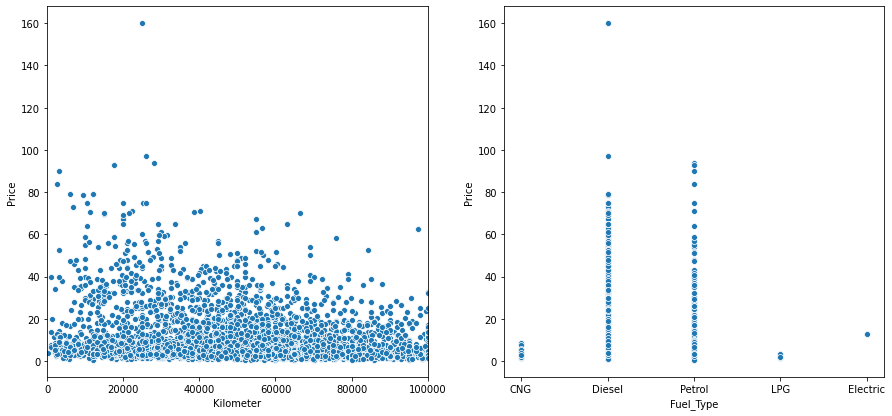

In [16]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=train)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

ax2 = fig.add_subplot(2,2,2)
#plt.xlim([0, 100000])
p2 = sns.scatterplot(x="Fuel_Type", y="Price", data=train)
loc, labels = plt.xticks()
ax2.set_xlabel('Fuel_Type')

plt.show()

# Data Preprocessing

In [17]:
# We deleted non-numeric columns that we would not export to the model.

a = ["x", "Name", "Location"]

for i in a:
    
    train.drop([i],axis=1,inplace = True)
    test.drop([i],axis=1,inplace = True)
    
train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [18]:
# We took the logarithm for the RMSE.

train["Price"] = np.log(train.Price)
test["Price"] = np.log(test.Price)
train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,0.559616
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,2.525729
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,1.504077
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,1.791759
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,2.875822


### deleting non-numeric characters from numerical data

In [19]:
# A function written for deleting non-numeric data in mileage and converting all rows to (kmpl).

def mili_a(tra):

    c = ["k","m","p","/","g","l"," "]

    v = []

    g = -1

    for i in tra.Mileage:

        kn = False

        g += 1

        v.append(i)

        a = i

        try:

            if "km/kg" in i:

                kn = True
        except:

            pass

        try:

            for z in c:

                a = a.replace(z,"")
        except:

            pass

        if kn == True:
            
            # Conversion

            v[g] = float(float(a)/2.352145833)

        else:

            v[g] = float(a)
            
    # I filled the values ​​in the data set (NONE) with the mean of rows.

    top = 0

    index = -1

    a = []

    for i in v:

        index += 1

        if i >=0:

            top += i


        else:

            a.append(index)

    ort = top / (index - len(a))

    b = -1

    for i in v:

        b += 1

        for z in a:

            if b == z:

                v[b] = ort
    c = -1

    Mileage_naa = []

    for i in tra.Mileage:

        c+=1

        kn = None

        for z in a:

            if c == int(z):

                Mileage_naa.append(True)

                kn = True

                break

        if kn == None:

            Mileage_naa.append(False)
            
    return v, Mileage_naa


In [20]:
v, a = mili_a(train)
    
train.drop(["Mileage"],axis=1,inplace = True)
train["Mileage"] = v
train["Mileage_naa"] = a
train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage,Mileage_naa
0,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,0.559616,11.308823,False
1,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,2.525729,19.670000,False
2,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,1.504077,18.200000,False
3,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,1.791759,20.770000,False
4,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,2.875822,15.200000,False


In [21]:
v, a = mili_a(test)
    
test.drop(["Mileage"],axis=1,inplace = True)
test["Mileage"] = v
test["Mileage_naa"] = a
test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage,Mileage_naa
0,2015,43000,Diesel,Manual,First,1248 CC,74 bhp,5.0,1.704748,26.59,False
1,2011,68000,Diesel,Manual,Second,2494 CC,102 bhp,7.0,1.945910,12.80,False
2,2016,45165,Diesel,Automatic,First,1995 CC,184 bhp,5.0,3.731699,16.09,False
3,2007,120000,Diesel,Automatic,First,1995 CC,218 bhp,5.0,2.351375,16.73,False
4,2014,86091,Diesel,Manual,First,2179 CC,140 bhp,7.0,2.311545,15.10,False


In [22]:
# A function written for deleting non-numeric values in the data and filling in rows without values.

def eng_i(tra):

    c = ["C","C", " "]

    v = []

    g = -1

    for i in tra.Engine:

        g += 1

        v.append(i)

        a = i

        try:

            for z in c:

                a = a.replace(z,"")
        except:

            pass


        v[g] = float(a)

    top = 0

    index = -1

    a = []

    for i in v:

        index += 1

        if i >=0:

            top += i


        else:

            a.append(index)

    ort = top / (index - len(a))

    b = -1

    for i in v:

        b += 1

        for z in a:

            if b == z:

                v[b] = ort
    
    # We fill in (None) values with row averages.
    
    top = 0

    index = -1

    a = []

    for i in v:

        index += 1

        if i >=0:

            top += i


        else:

            a.append(index)

    ort = top / (index - len(a))

    b = -1

    for i in v:

        b += 1

        for z in a:

            if b == z:

                v[b] = ort
            
    c = -1

    Mileage_naa = []

    for i in tra.Mileage:

        c+=1

        kn = None

        for z in a:

            if c == int(z):

                Mileage_naa.append(True)

                kn = True

                break

        if kn == None:

            Mileage_naa.append(False)
            
    return v, Mileage_naa


In [23]:
v, a = eng_i(train)

train.drop(["Engine"],axis=1,inplace = True)
train["Engine"] = v
train["Engine_naa"] = a
train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Mileage,Mileage_naa,Engine,Engine_naa
0,2010,72000,CNG,Manual,First,58.16 bhp,5.0,0.559616,11.308823,False,998.0,False
1,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,2.525729,19.670000,False,1582.0,False
2,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,1.504077,18.200000,False,1199.0,False
3,2012,87000,Diesel,Manual,First,88.76 bhp,7.0,1.791759,20.770000,False,1248.0,False
4,2013,40670,Diesel,Automatic,Second,140.8 bhp,5.0,2.875822,15.200000,False,1968.0,False


In [24]:
v, a = eng_i(test)

test.drop(["Engine"],axis=1,inplace = True)
test["Engine"] = v
test["Engine_naa"] = a
test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Mileage,Mileage_naa,Engine,Engine_naa
0,2015,43000,Diesel,Manual,First,74 bhp,5.0,1.704748,26.59,False,1248.0,False
1,2011,68000,Diesel,Manual,Second,102 bhp,7.0,1.945910,12.80,False,2494.0,False
2,2016,45165,Diesel,Automatic,First,184 bhp,5.0,3.731699,16.09,False,1995.0,False
3,2007,120000,Diesel,Automatic,First,218 bhp,5.0,2.351375,16.73,False,1995.0,False
4,2014,86091,Diesel,Manual,First,140 bhp,7.0,2.311545,15.10,False,2179.0,False


In [25]:
# We cleared the non-numeric characters in the column. And we filled the values (None) with average values.

def pow_e(tra):

    c = ["b","h","p"," "]

    v = []

    g = -1

    for i in tra.Power:

        g += 1

        v.append(i)

        a = i

        try:

            for z in c:

                a = a.replace(z,"")
        except:

            pass

        try:
            v[g] = float(a)

        except:

           v[g] = float(-8) 

    top = 0

    index = -1

    a = []

    for i in v:

        index += 1

        if i >=0:

            top += i


        else:

            a.append(index)

    ort = top / (index - len(a))

    b = -1

    for i in v:

        b += 1

        for z in a:

            if b == z:

                v[b] = ort

    top = 0

    index = -1

    a = []

    for i in v:

        index += 1

        if i >=0:

            top += i


        else:

            a.append(index)

    ort = top / (index - len(a))

    b = -1

    for i in v:

        b += 1

        for z in a:

            if b == z:

                v[b] = ort
                
    c = -1

    Mileage_naa = []

    for i in tra.Mileage:

        c+=1

        kn = None

        for z in a:

            if c == int(z):

                Mileage_naa.append(True)

                kn = True

                break

        if kn == None:

            Mileage_naa.append(False)
            
    return v, Mileage_naa
            

In [26]:
v, a = pow_e(train)

train.drop(["Power"],axis=1,inplace = True)
train["Power"] = v
train["Power_naa"] = a
train.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage,Mileage_naa,Engine,Engine_naa,Power,Power_naa
0,2010,72000,CNG,Manual,First,5.0,0.559616,11.308823,False,998.0,False,58.16,False
1,2015,41000,Diesel,Manual,First,5.0,2.525729,19.670000,False,1582.0,False,126.20,False
2,2011,46000,Petrol,Manual,First,5.0,1.504077,18.200000,False,1199.0,False,88.70,False
3,2012,87000,Diesel,Manual,First,7.0,1.791759,20.770000,False,1248.0,False,88.76,False
4,2013,40670,Diesel,Automatic,Second,5.0,2.875822,15.200000,False,1968.0,False,140.80,False


In [27]:
v, b = pow_e(test)

test.drop(["Power"],axis=1,inplace = True)
test["Power"] = v
test["Power_naa"] = b
test.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage,Mileage_naa,Engine,Engine_naa,Power,Power_naa
0,2015,43000,Diesel,Manual,First,5.0,1.704748,26.59,False,1248.0,False,74.0,False
1,2011,68000,Diesel,Manual,Second,7.0,1.945910,12.80,False,2494.0,False,102.0,False
2,2016,45165,Diesel,Automatic,First,5.0,3.731699,16.09,False,1995.0,False,184.0,False
3,2007,120000,Diesel,Automatic,First,5.0,2.351375,16.73,False,1995.0,False,218.0,False
4,2014,86091,Diesel,Manual,First,7.0,2.311545,15.10,False,2179.0,False,140.0,False


### Coding categorical variables numerically

In [28]:
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

In [29]:
def apply_cats(df, train):
    for n, c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, ordered = True)

In [30]:
train_cats(test)
train_cats(train)

In [31]:
train["Fuel_Type"]
test["Fuel_Type"]

0       Diesel
1       Diesel
2       Diesel
3       Diesel
4       Diesel
         ...  
1023    Diesel
1024    Diesel
1025    Diesel
1026    Petrol
1027    Diesel
Name: Fuel_Type, Length: 1028, dtype: category
Categories (4, object): [CNG < Diesel < LPG < Petrol]

In [32]:
print(train["Fuel_Type"].cat.categories)
print(test["Fuel_Type"].cat.categories)
 
print(train["Transmission"].cat.categories)
print(test["Transmission"].cat.categories)

print(train["Owner_Type"].cat.categories)
print(test["Owner_Type"].cat.categories)

Index(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype='object')
Index(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='object')
Index(['Automatic', 'Manual'], dtype='object')
Index(['Automatic', 'Manual'], dtype='object')
Index(['First', 'Fourth & Above', 'Second', 'Third'], dtype='object')
Index(['First', 'Fourth & Above', 'Second', 'Third'], dtype='object')


In [33]:
train["Fuel_Type"].cat.set_categories(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], ordered = True, inplace = True)
test["Fuel_Type"].cat.set_categories(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], ordered = True, inplace = True)

train["Transmission"].cat.set_categories(['Automatic', 'Manual'], ordered = True, inplace = True)
test["Transmission"].cat.set_categories(['Automatic', 'Manual'], ordered = True, inplace = True)

train["Owner_Type"].cat.set_categories(['First', 'Fourth & Above', 'Second', 'Third'], ordered = True, inplace = True)
test["Owner_Type"].cat.set_categories(['First', 'Fourth & Above', 'Second', 'Third'], ordered = True, inplace = True)

In [34]:
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum:
            df[name+"_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())

In [35]:
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes+1

In [36]:
def proc_df(df, y_fld):
    
    y = df[y_fld].values
    df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        numericalize(df, c, n)
    
    res = [df, y]
    
    return res

In [37]:
train, y_train = proc_df(train, 'Price')
test, y_test = proc_df(test, 'Price')

In [38]:
print(len(y_train))
print(len(train))

for i in train.columns:
    
    a = i + "{}".format("_na")
    
    try:
    
        train.drop([a],axis=1,inplace = True)
        test.drop([a],axis=1,inplace = True)
        
    except:
        
        pass
    
train.head()

4991
4991


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage,Mileage_naa,Engine,Engine_naa,Power,Power_naa
0,2010,72000,1,2,1,5.0,11.308823,False,998.0,False,58.16,False
1,2015,41000,2,2,1,5.0,19.670000,False,1582.0,False,126.20,False
2,2011,46000,5,2,1,5.0,18.200000,False,1199.0,False,88.70,False
3,2012,87000,2,2,1,7.0,20.770000,False,1248.0,False,88.76,False
4,2013,40670,2,1,3,5.0,15.200000,False,1968.0,False,140.80,False


#  Random Forest Regressor

In [39]:
# sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

m = RandomForestRegressor(n_jobs=-1)
m.fit(train, y_train)
m.score(train,y_train)

0.9885806192240673

### Validation set

In [40]:
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [41]:
n_valid = 2000
n_train = len(train)-n_valid

train, validation = split_train_val(train, n_train)
y_train, y_validation = split_train_val(y_train, n_train)

In [42]:
# Our evaluation metric.

def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [43]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(validation), y_validation)}")
    print(f"R^2 of train set {m.score(train, y_train)}")
    print(f"R^2 of validation set {m.score(validation, y_validation)}")

### We have to try different models quickly.

In [44]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(train, y_train)
print_score(m)

CPU times: user 1.78 s, sys: 16.2 ms, total: 1.79 s
Wall time: 514 ms
RMSE of train set 0.09409210505574325
RMSE of validation set 0.26995303193193876
R^2 of train set 0.9887668075706516
R^2 of validation set 0.8997048122480426


In [45]:
# n_estimators, The number of trees in the forest.
# max_depth, The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# bootstrap, Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

m = RandomForestRegressor(n_estimators=20, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(train, y_train)
print_score(m)

RMSE of train set 0.4353357334012457
RMSE of validation set 0.4495008089730274
R^2 of train set 0.759538549728518
R^2 of validation set 0.7219232801197681


In [46]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
t = m.fit(train, y_train)
print_score(m)

RMSE of train set 0.10491255655593021
RMSE of validation set 0.27255887412782304
R^2 of train set 0.9860346517687552
R^2 of validation set 0.8977591786260104


### Plotting a Tree

In [47]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(train, y_train)
print_score(m)

RMSE of train set 0.4353357334012457
RMSE of validation set 0.4495008089730274
R^2 of train set 0.759538549728518
R^2 of validation set 0.7219232801197681


[Text(1162.5, 1981.875, 'Power <= 134.0\nmse = 0.788\nsamples = 2991\nvalue = 1.842'),
 Text(581.25, 1415.625, 'Year <= 2011.5\nmse = 0.36\nsamples = 2187\nvalue = 1.462'),
 Text(290.625, 849.375, 'Engine <= 1496.0\nmse = 0.323\nsamples = 563\nvalue = 0.875'),
 Text(145.3125, 283.125, 'mse = 0.197\nsamples = 374\nvalue = 0.682'),
 Text(435.9375, 283.125, 'mse = 0.351\nsamples = 189\nvalue = 1.257'),
 Text(871.875, 849.375, 'Power <= 87.0\nmse = 0.212\nsamples = 1624\nvalue = 1.666'),
 Text(726.5625, 283.125, 'mse = 0.132\nsamples = 877\nvalue = 1.434'),
 Text(1017.1875, 283.125, 'mse = 0.169\nsamples = 747\nvalue = 1.938'),
 Text(1743.75, 1415.625, 'Year <= 2012.5\nmse = 0.493\nsamples = 804\nvalue = 2.875'),
 Text(1453.125, 849.375, 'Power <= 166.15\nmse = 0.38\nsamples = 261\nvalue = 2.317'),
 Text(1307.8125, 283.125, 'mse = 0.202\nsamples = 92\nvalue = 1.848'),
 Text(1598.4375, 283.125, 'mse = 0.293\nsamples = 169\nvalue = 2.572'),
 Text(2034.375, 849.375, 'Power <= 187.55\nmse = 0.

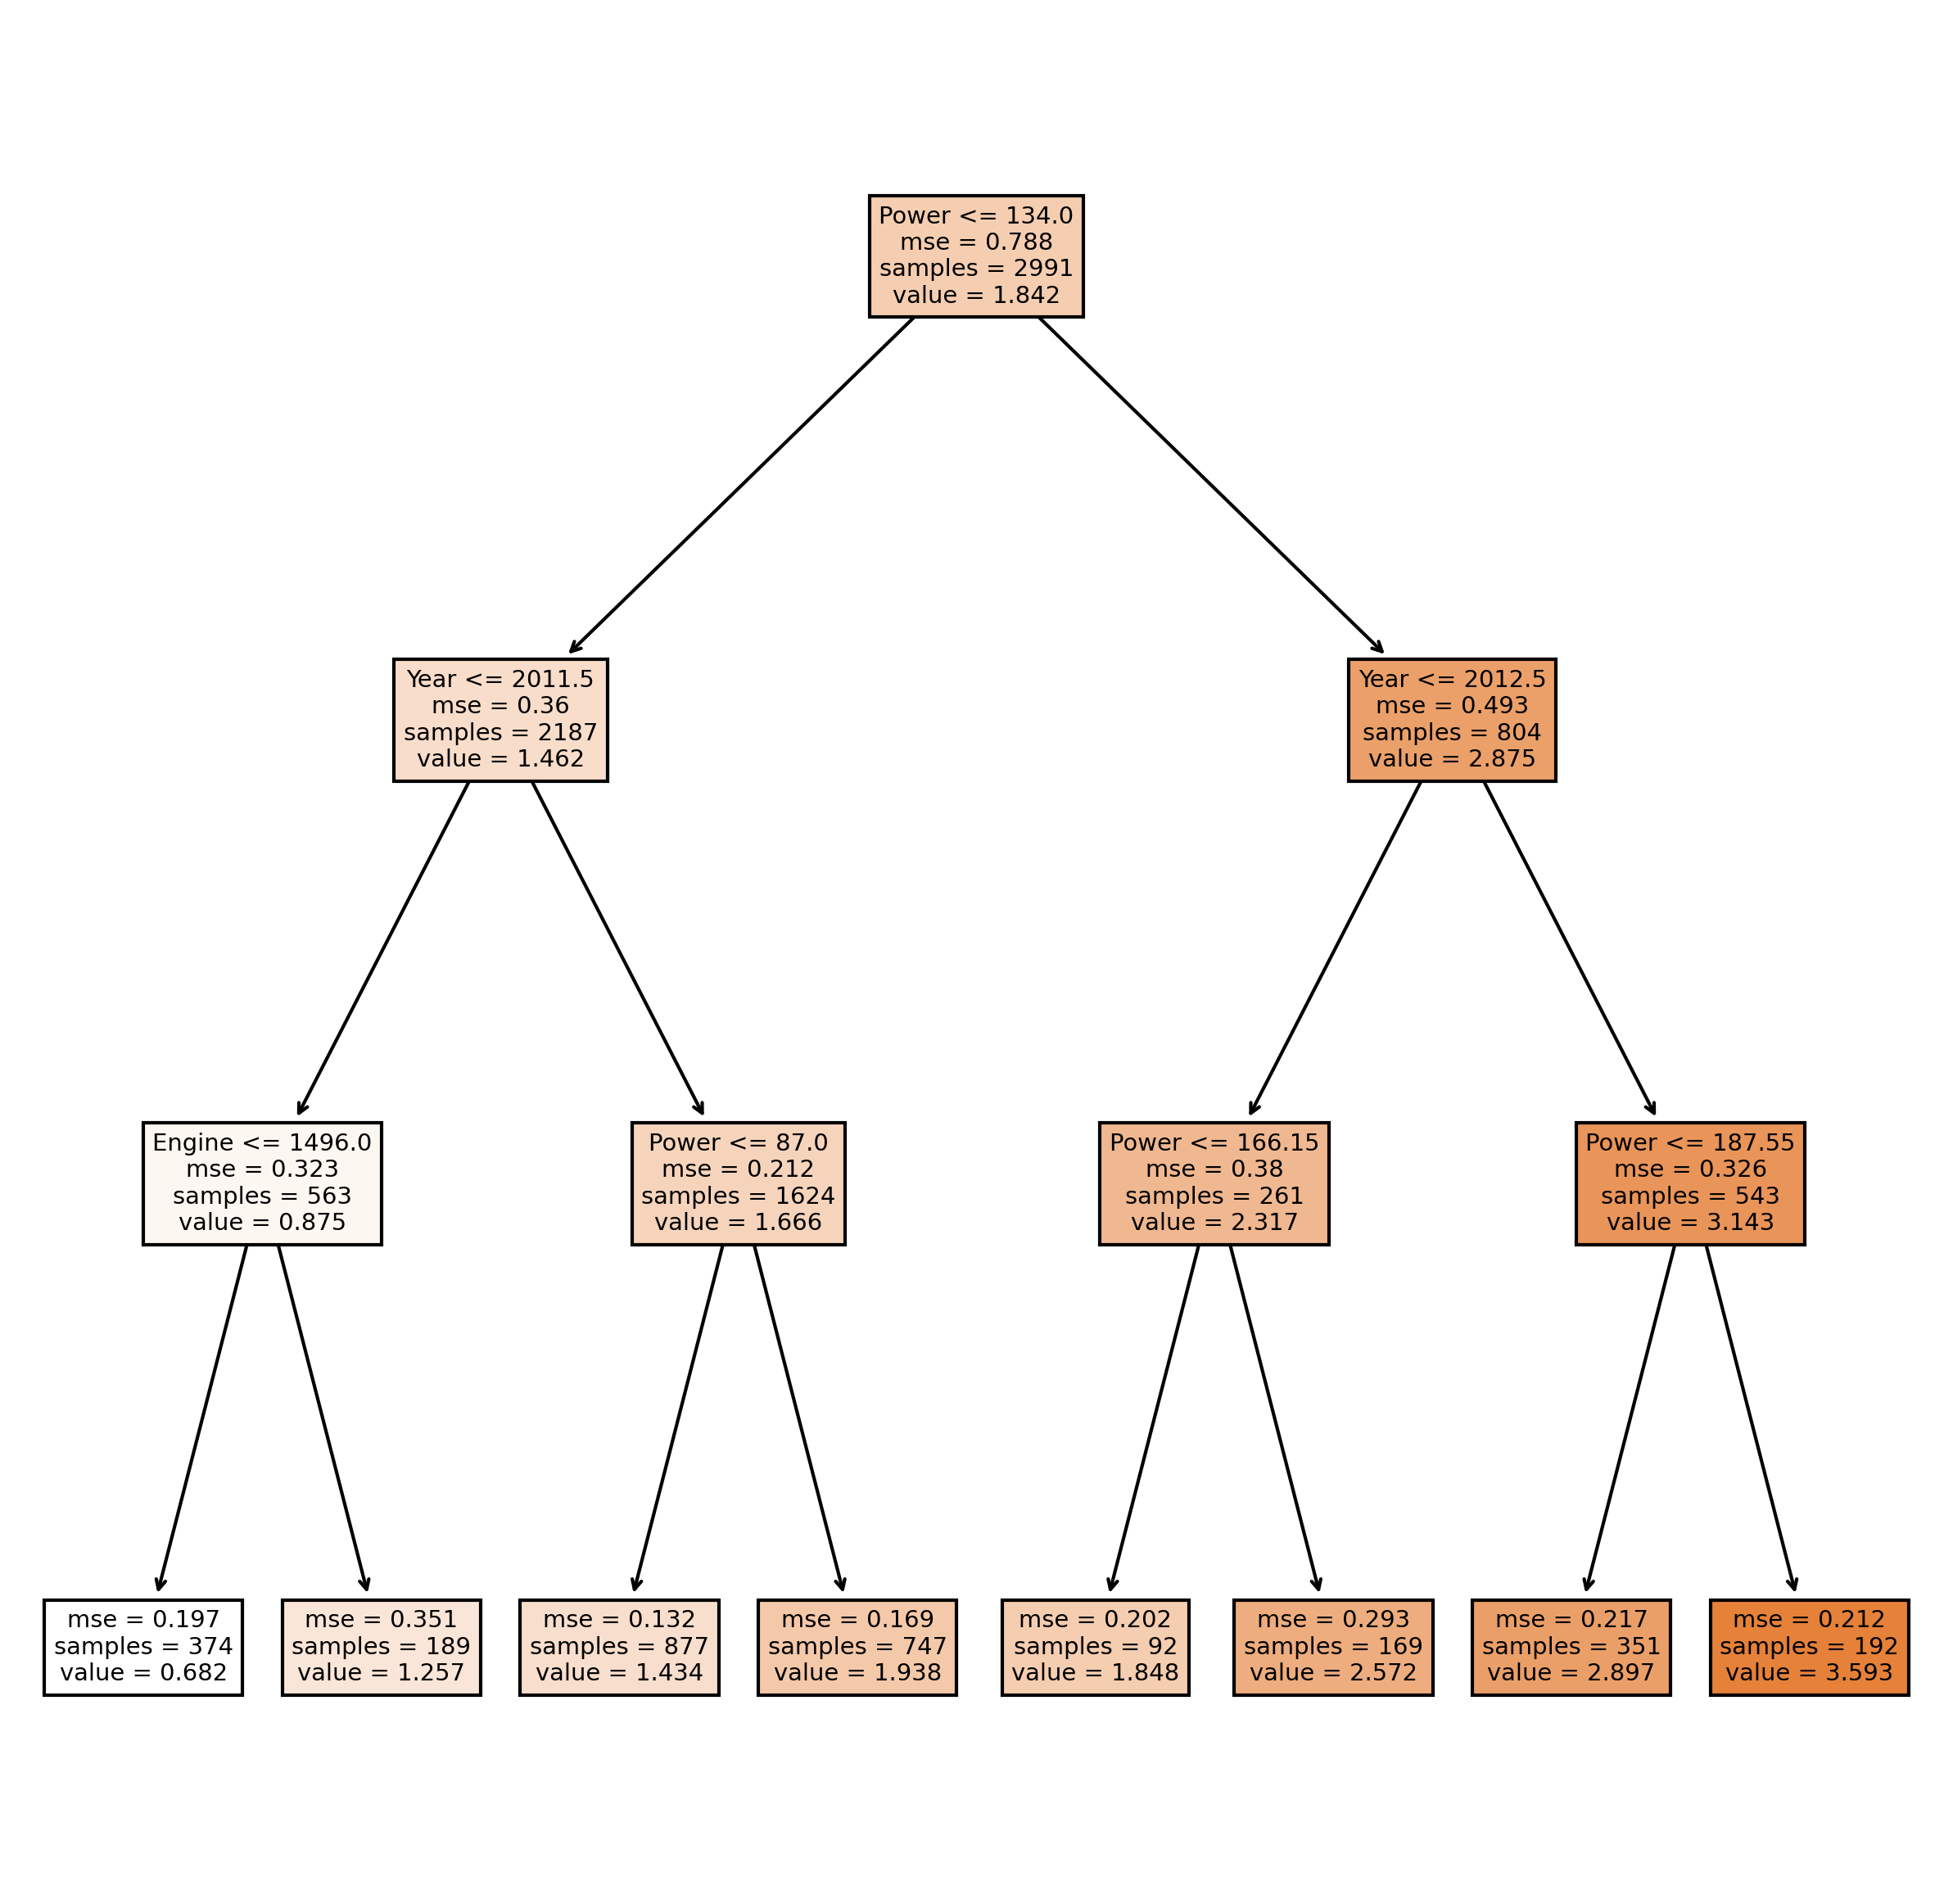

In [48]:
estimator = m.estimators_[0]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(estimator, feature_names=train.columns,filled=True)

In [49]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(train, y_train)
print_score(m)

CPU times: user 2.07 s, sys: 40.1 ms, total: 2.11 s
Wall time: 536 ms
RMSE of train set 0.09550406823021701
RMSE of validation set 0.26703538633254015
R^2 of train set 0.9884271433776329
R^2 of validation set 0.9018610722824432


In [50]:
#preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds = np.array([t.predict(validation) for t in m.estimators_]) # list of arrays of predictions
preds[:,0], np.mean(preds[:,0]), y_validation[0]

(array([0.22314355, 0.46373402, 0.18232156, 0.89608802, 0.46373402,
        0.46373402, 0.46373402, 0.46373402, 0.46373402, 0.46373402,
        0.46373402, 0.46373402, 0.46373402, 0.18232156, 0.18232156,
        0.46373402, 0.46373402, 0.46373402, 0.18232156, 0.46373402,
        0.46373402, 0.18232156, 0.46373402, 0.46373402, 0.46373402,
        0.46373402, 0.46373402, 0.01980263, 0.01980263, 0.46373402,
        0.18232156, 0.33647224, 0.40546511, 0.40546511, 0.46373402,
        0.46373402, 0.46373402, 0.18232156, 0.46373402, 0.46373402,
        0.46373402, 0.46373402, 0.46373402, 0.46373402, 0.18232156,
        0.01980263, 0.46373402, 0.46373402, 0.46373402, 0.44718616,
        0.46373402, 0.50077529, 0.46373402, 0.46373402, 0.46373402,
        0.37156356, 0.01980263, 0.46373402, 0.46373402, 0.46373402,
        0.18232156, 0.46373402, 0.46373402, 0.18232156, 0.46373402,
        0.46373402, 0.46373402, 0.46373402, 0.18232156, 0.46373402,
        0.40546511, 0.18232156, 0.46373402, 0.37

### Exploring Effect of Adding More Trees on 𝑅2


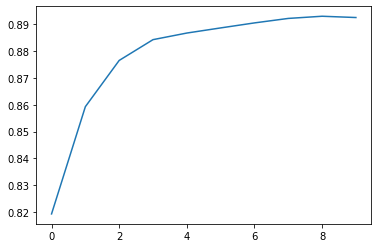

In [51]:
plt.plot([metrics.r2_score(y_validation, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

### Out-of-bag (OOB) score

In [52]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(validation), y_validation)}")
    print(f"R^2 of train set {m.score(train, y_train)}")
    print(f"R^2 of validation set {m.score(validation, y_validation)}")
    if hasattr(m, "oob_score_"):
        print(f"OOB score: {m.oob_score_}")

In [53]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True)
m.fit(train, y_train)
print_score(m)

RMSE of train set 0.09682446108178697
RMSE of validation set 0.271376707837777
R^2 of train set 0.9881049298986144
R^2 of validation set 0.8986441510072513
OOB score: 0.9143583203436355


In [54]:
# It will train more quickly because it will be less deep
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(train, y_train)
print_score(m)

CPU times: user 681 ms, sys: 39.9 ms, total: 721 ms
Wall time: 354 ms
RMSE of train set 0.16548202508836496
RMSE of validation set 0.2732908206940168
R^2 of train set 0.9652545066275809
R^2 of validation set 0.8972093135635818
OOB score: 0.908773268988757


In [55]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(train, y_train)
print_score(m)

RMSE of train set 0.17564637337038133
RMSE of validation set 0.2663421588654497
R^2 of train set 0.9608550986087299
R^2 of validation set 0.9023699508580019
OOB score: 0.9135438902662368


### Feature importance

We may also want how our model is making predictions, and we can investigate this by feature importance

In practice you can build random forest as fast as you can, and that model does not have to be perfect but it has to learn some patterns, then plot feature importance to learn more about data !

This function is wrapper around sklearn model objects.

    It will create a df that shows feature importance

In [56]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [57]:
len(m.feature_importances_) # equals to the number of columns

12

In [58]:
m.feature_importances_

array([0.19651671, 0.03371666, 0.02101365, 0.08989646, 0.00339036,
       0.00826023, 0.02618536, 0.        , 0.18111673, 0.        ,
       0.43990383, 0.        ])

In [59]:
feature_importance = rf_feat_importance(m, train);

In [60]:
feature_importance[:10]

,columns,importance
10,Power,0.439904
0,Year,0.196517
8,Engine,0.181117
3,Transmission,0.089896
1,Kilometers_Driven,0.033717
6,Mileage,0.026185
2,Fuel_Type,0.021014
5,Seats,0.008260
4,Owner_Type,0.003390
7,Mileage_naa,0.000000


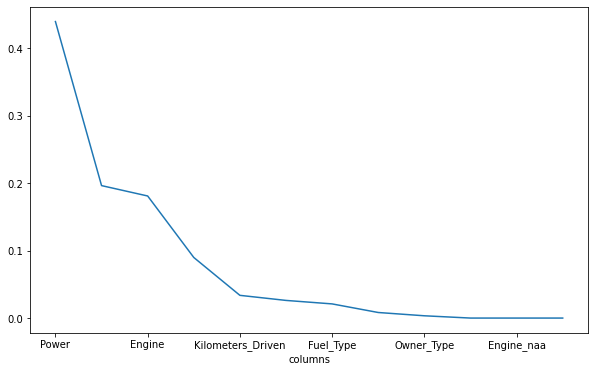

In [61]:
feature_importance.plot('columns', 'importance', figsize=(10,6), legend=False);

In [62]:
def plot_feature_importance(fi): 
    return fi.plot('columns', 'importance', 'barh', figsize=(12,7), legend=False)

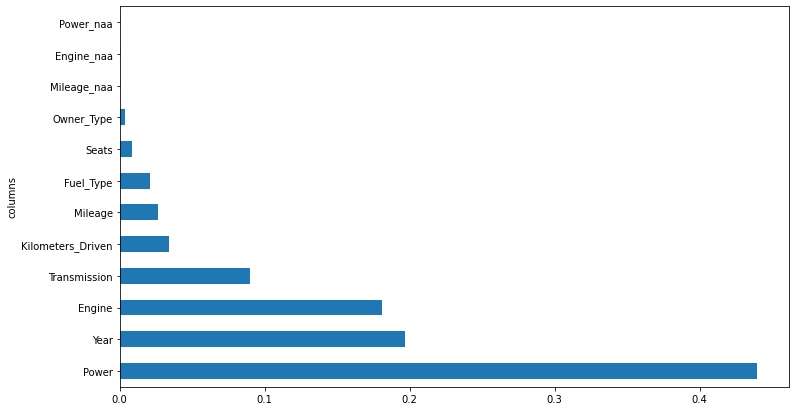

In [63]:
plot_feature_importance(feature_importance[:30]);
# If one of the correlated variables is omitted, the other becomes important.

In [64]:
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"]; 
len(keep_columns)

8

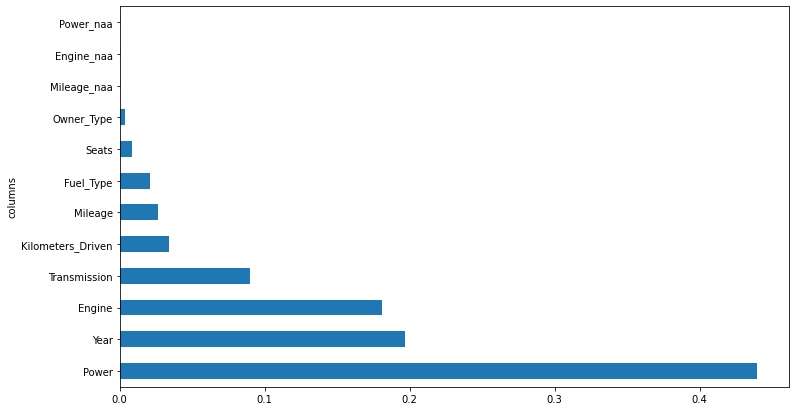

In [65]:
plot_feature_importance(feature_importance[:30]);
# If one of the correlated variables is omitted, the other becomes important.

In [81]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, train, train.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


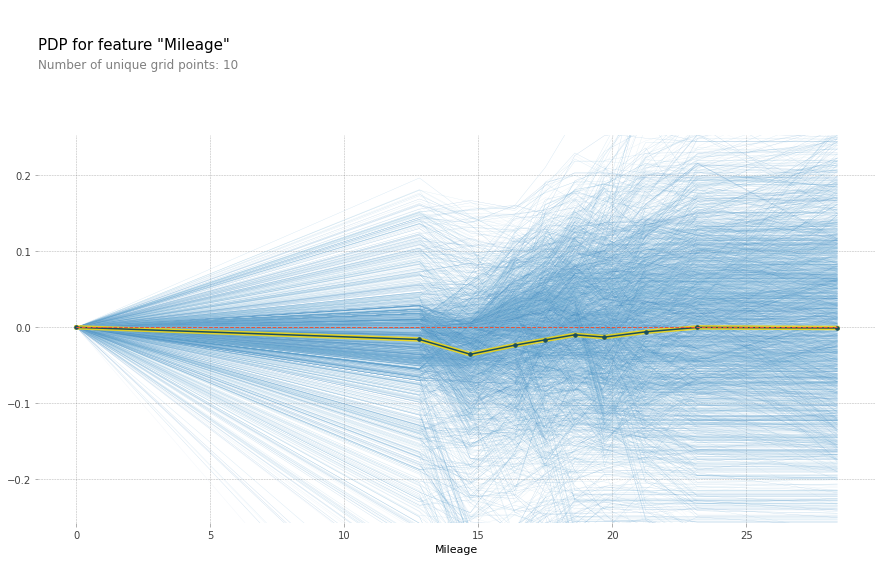

In [83]:
plot_pdp('Mileage');

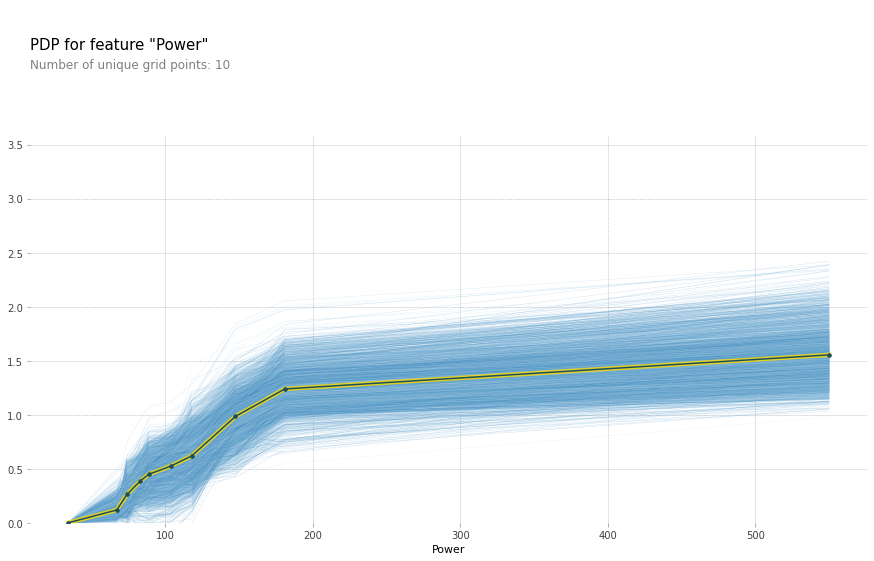

In [84]:
plot_pdp('Power');

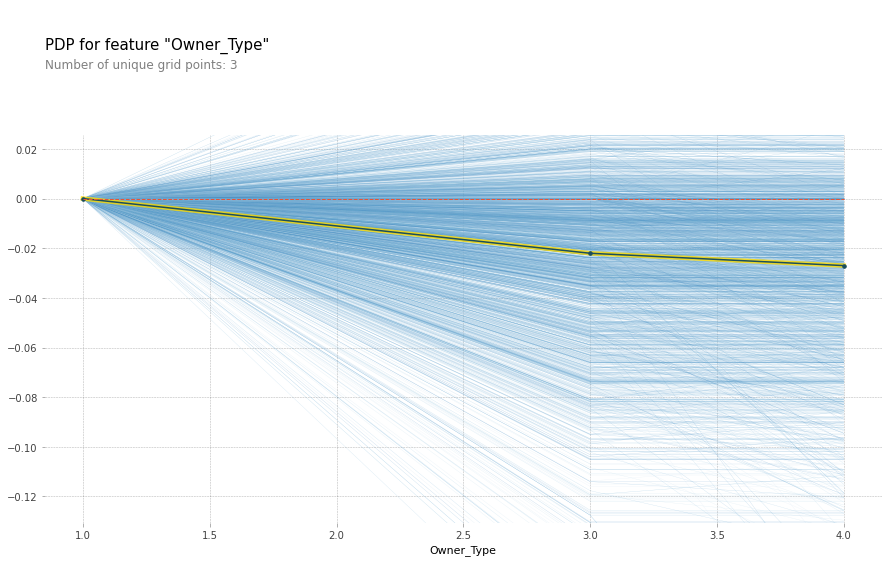

In [85]:
plot_pdp('Owner_Type');

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f914160c898>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f914116a8d0>})

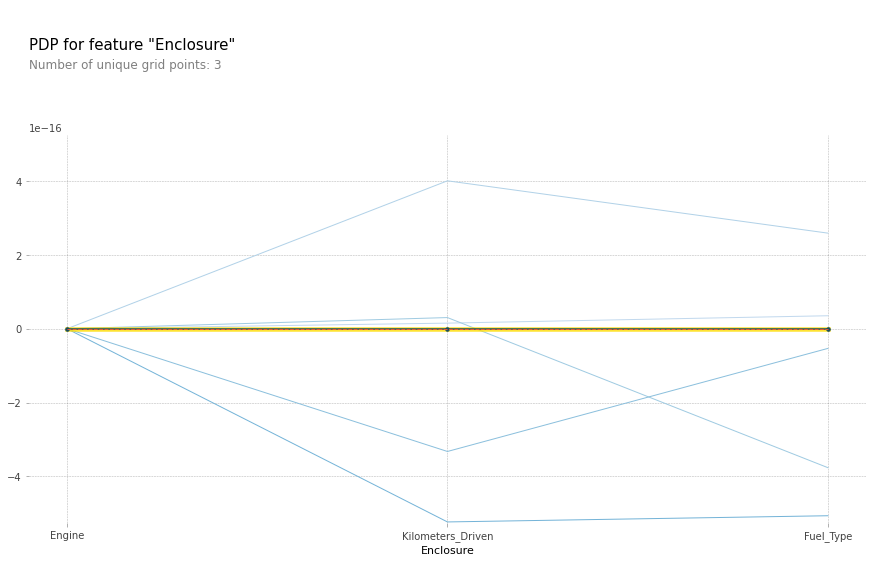

In [89]:
plot_pdp(["Engine", "Kilometers_Driven", "Fuel_Type"], 5, 'Enclosure')

In [91]:
# final model
m = RandomForestRegressor(n_estimators=120, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(train, y_train)
print_score(m)

CPU times: user 1.8 s, sys: 104 ms, total: 1.9 s
Wall time: 689 ms
RMSE of train set 0.09148859160881018
RMSE of validation set 0.2613449697926086
R^2 of train set 0.9893798484772709
R^2 of validation set 0.9059991095523958
OOB score: 0.9217892618913855


In [105]:
# Test

print(f"RMSE of test set {rmse(m.predict(test), y_test)}")
print(f"R^2 of test set {m.score(test, y_test)}")

RMSE of test set 0.2401955623852554
R^2 of test set 0.9244840784200263
